In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
credit = pd.read_csv('credit_train.csv')
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# > 50% missing values
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
# 514 rows x 16 columns NaN 
credit.drop(credit.tail(514).index, inplace=True)

for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

credit.fillna(credit.mean(), inplace=True)
credit.fillna('10+ years', inplace=True)

In [3]:
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_subset = pd.get_dummies(categorical_subset)
credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

label = credit['Loan Status']
data = credit.drop(columns='Loan Status')
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

In [4]:
##Training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
##Testing
y_pred = clf.predict(X_test)
report1 = metrics.classification_report(y_test, y_pred)
print(report1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.46      0.44      0.45      6787
  Fully Paid       0.84      0.85      0.84     23152

    accuracy                           0.75     29939
   macro avg       0.65      0.64      0.64     29939
weighted avg       0.75      0.75      0.75     29939

Accuracy: 0.7538327933464711


In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(222.08971278732565, 215.34923076923076, 'X[1] <= 3463.138\ngini = 0.35\nsamples = 69855\nvalue = [15800, 54055]'),
 Text(222.0454620783286, 211.1676923076923, 'X[0] <= 50394625.0\ngini = 0.306\nsamples = 66646\nvalue = [12591, 54055]'),
 Text(222.00121136933154, 206.98615384615385, 'X[11] <= 0.5\ngini = 0.337\nsamples = 58669\nvalue = [12591, 46078]'),
 Text(147.57035068981023, 202.80461538461537, 'X[2] <= 1383285.5\ngini = 0.307\nsamples = 42112\nvalue = [7971, 34141]'),
 Text(86.62986344549047, 198.62307692307692, 'X[27] <= 0.5\ngini = 0.333\nsamples = 31171\nvalue = [6576, 24595]'),
 Text(32.56952061320482, 194.44153846153847, 'X[1] <= 725.5\ngini = 0.306\nsamples = 15602\nvalue = [2947, 12655]'),
 Text(10.678838421926073, 190.26, 'X[1] <= 694.5\ngini = 0.267\nsamples = 4879\nvalue = [775, 4104]'),
 Text(2.2083005187178837, 186.07846153846154, 'X[8] <= 208021.0\ngini = 0.355\nsamples = 862\nvalue = [199, 663]'),
 Text(0.9719599089468639, 181.8969230769231, 'X[9] <= 1.5\ngini =

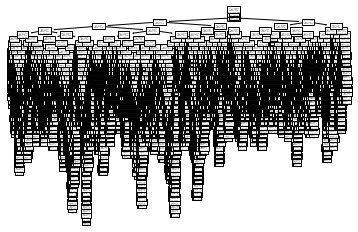

In [7]:
fig = plt.figure()
tree.plot_tree(clf)

In [8]:
fig.savefig('temp.png', dpi=fig.dpi)